In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [2]:
class SoftmaxRegression(d2l.Classifier):
  def __init__(self, num_outputs, lr):
    super().__init__()
    self.save_hyperparameters()
    
    self.net = nn.Sequential(
      nn.Flatten(),
      nn.LazyLinear(num_outputs)
    )
    
  def forward(self, X):
    return self.net(X)
    

In [3]:
@d2l.add_to_class(SoftmaxRegression)
def loss(self, Y_hat, Y, avereged=True):
  Y_hat = Y_hat.reshape((-1 ,Y_hat.shape[-1]))
  Y = Y.reshape((-1, ))
  
  return F.cross_entropy(Y_hat, Y, reduction="mean" if avereged else "none")

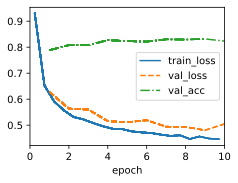

In [5]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### Exercises

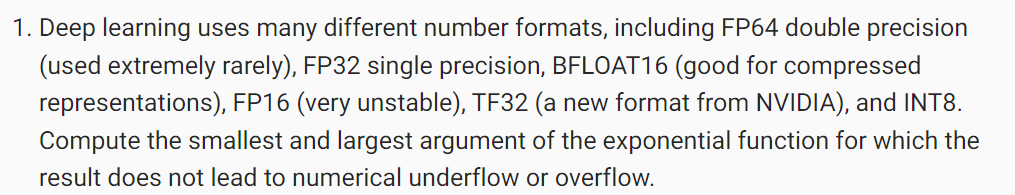

In [ ]:
X = torch.arange(-200, 100, 0.01)
exp_X = torch.exp(X) 

max_val = exp_X[exp_X != torch.inf][-1]
min_val = exp_X[exp_X != 0][0]

print(f"Max value: {torch.log(max_val)}")
print(f"Min value: {torch.log(min_val)}")

Max value: 88.72000122070312
Min value: -103.2789306640625


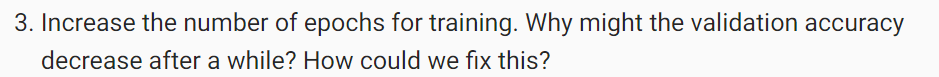

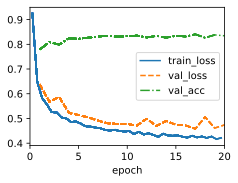

In [ ]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(model, data)

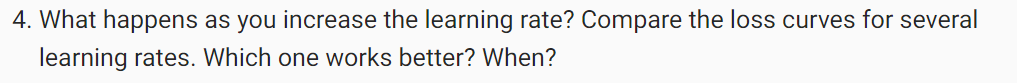

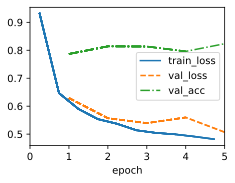

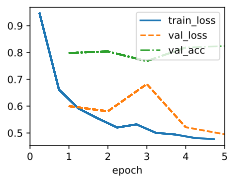

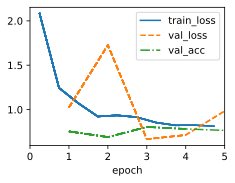

In [6]:
for lr in [0.1, 0.2, 0.5]:
  data = d2l.FashionMNIST(batch_size=256)
  model = SoftmaxRegression(num_outputs=10, lr=lr)
  trainer = d2l.Trainer(max_epochs=5)
  trainer.fit(model, data)

With smaller learning rate - validation loss is more smooth, and this has explantions, because when optimizer takes smaller step - the gradient does not changes extremely and as a consequence - the weights changes more stable